# Análisis Exploratorio de Datos (EDA): Enfoque Univariado y Multivariado

## librerias y datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("wine_dataset_clean.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111439 entries, 0 to 111438
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   country   111439 non-null  object 
 1   province  111439 non-null  object 
 2   points    111439 non-null  int64  
 3   price     111439 non-null  float64
 4   variety   111439 non-null  object 
 5   title     111439 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


## Análisis Univariado

### Columna "country" - pais. Análisis no-gráfico
El EDA de datos univariados se utilizo para analizar los datos de la columna "country"

#### Categorias únicas - número de paises

In [4]:
categorias_unicas = dataset["country"].unique()
print(categorias_unicas)

['Portugal' 'US' 'Spain' 'Italy' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' 'Turkey' 'Czech Republic' 'Slovenia'
 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon' 'Serbia'
 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus' 'Armenia'
 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia' 'Macedonia'
 'China']


In [5]:
categorias_unicas = dataset["country"].nunique()
print(categorias_unicas)

42


#### Frecuencia absoluta

En lugar de mostrar todos los países, mostrar aquellos con más de 1000 registros

In [7]:
dataset["country"].value_counts().rename_axis("country").reset_index(name="count")

,country,count
0,US,50215
1,France,16254
2,Italy,15487
3,Spain,6032
4,Portugal,4501
5,Chile,4129
6,Argentina,3501
7,Austria,2535
8,Australia,2166
9,Germany,1951


#### Frecuencia relativa

Seguir la idea del punto anterior - mostrar los mayores a 1000 registros

In [8]:
# Paso 1
freq_relativa = dataset['country'].value_counts(normalize=True)

# Paso 2
porcentajes = freq_relativa * 100

# Paso 3
porcentajes_df = porcentajes.rename_axis('Country').reset_index(name="porcentaje")

# Paso 4
porcentajes_df['porcentaje'] = porcentajes_df['porcentaje'].round(3)

porcentajes_df

,Country,porcentaje
0,US,45.061
1,France,14.586
2,Italy,13.897
3,Spain,5.413
4,Portugal,4.039
5,Chile,3.705
6,Argentina,3.142
7,Austria,2.275
8,Australia,1.944
9,Germany,1.751


### Columna "country" - pais. Análisis gráfico

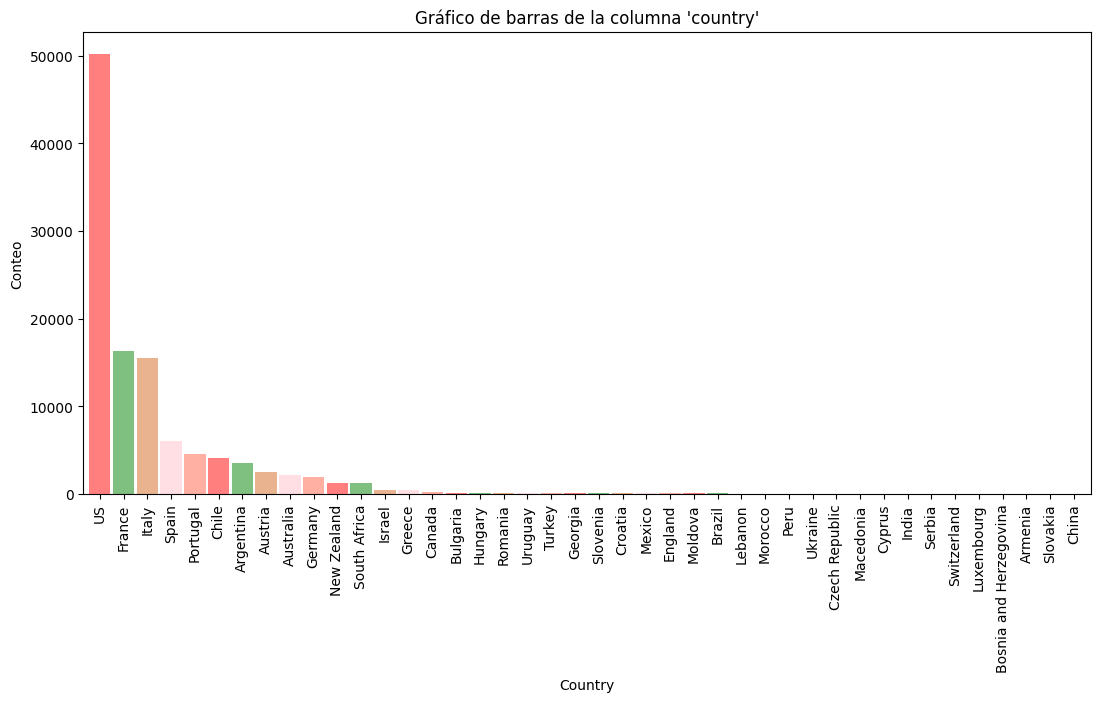

In [9]:
# Gráfico de barras

conteo = dataset['country'].value_counts()
colores = ['red', 'green', 'chocolate', 'pink', 'tomato']

plt.figure(figsize=(13,6))
conteo.plot(kind='bar', color=colores, width=0.9, alpha=0.5)

plt.title("Gráfico de barras de la columna 'country'")
plt.ylabel('Conteo')
plt.xlabel('Country')

plt.show()

A partir de los datos, se observa que 'US' es el pais que más cuenta con registros y vinos dentro de este dataset. Los datos para 'US' son superiores a todos los otros países. A 'US' le siguen los 4 principales y más reconocidos países de Europa en producción de vino 'France', 'Italy', 'Spain', 'Portugal'.

In [10]:
porcentaje = dataset['country'].value_counts(normalize=True)
porcentaje = porcentaje * 100

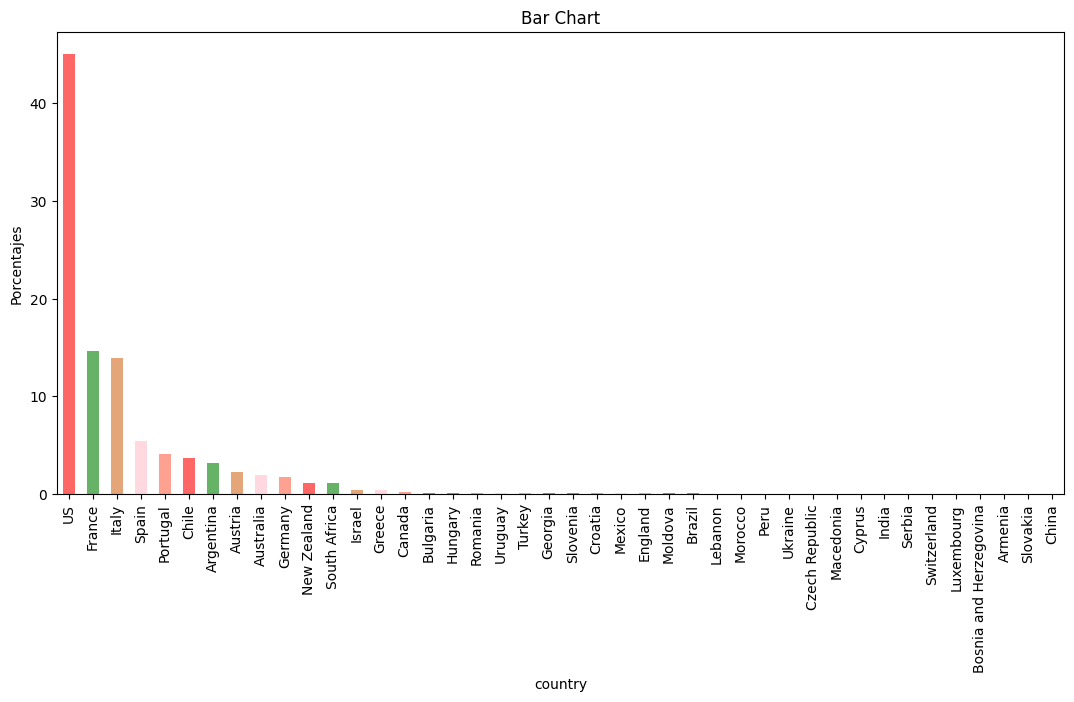

In [19]:
plt.figure(figsize=(13,6))
porcentaje.plot(kind='bar', color=colores, alpha=0.6)

plt.title("Bar Chart")
plt.ylabel("Porcentajes")
plt.show()

### Columna "Points" - Puntos

#### Frecuencias

In [21]:
# definir límites e intervalos

bins = [80,85,90,95,100] # 4 intervalos: 80-85, 85-90, 90-95, 95-100
labels = ["80-85", "85-90", "90-95", "95-100"]

# crear columna con intervalos
dataset['intervalo'] = pd.cut(dataset['points'], bins=bins, labels=labels, right=False)

# Calcular frecuencia abosoluta
frecuencia = dataset['intervalo'].value_counts().sort_index()

# Calcular frecuencia relativa
frecuencia_relativa = frecuencia / frecuencia.sum()

# Calcular frecuencia acumulada
frecuencia_acumulada = frecuencia.cumsum()
frecuencia_relativa_acumulada = frecuencia_relativa.cumsum()

# Crear DataFrame con la tabla de frecuencias
tabla_frecuencias = pd.DataFrame({
    'Intervalo': frecuencia.index,
    'Frecuencia': frecuencia.values,
    'Frecuencia Relativa': frecuencia_relativa.values,
    'Frecuencia Acumulada': frecuencia_acumulada.values,
    'Frecuencia Relativa Acumulada': frecuencia_relativa_acumulada.values
})

print(tabla_frecuencias)

  Intervalo  Frecuencia  Frecuencia Relativa  Frecuencia Acumulada  \
0     80-85       11508             0.103285                 11508   
1     85-90       57860             0.519296                 69368   
2     90-95       39881             0.357934                109249   
3    95-100        2171             0.019485                111420   

   Frecuencia Relativa Acumulada  
0                       0.103285  
1                       0.622581  
2                       0.980515  
3                       1.000000  


#### Media, Mediana y Moda

In [20]:
mean = dataset['points'].mean()
median = dataset['points'].median()
mode = dataset['points'].mode()
print(f"La media es: {mean}")
print(f"La mediana es: {median}")
print(f"La moda es: {mode}")

La media es: 88.41367923258464
La mediana es: 88.0
La moda es: 0    87
Name: points, dtype: int64


#### Máximo valor,  Mínimo valor y rango

In [26]:
max_value = dataset['points'].max()
print(f"La máxima puntuación es: {max_value}")

La máxima puntuación es: 100


In [27]:
min_value = dataset['points'].min()
print(f"La mínima puntuación es: {min_value}")

La mínima puntuación es: 80


In [30]:
rango = max_value - min_value
print(f"El rango de los valroes de la puntuación es: {rango}")

El rango de los valroes de la puntuación es: 20


Observase que las puntuaciones de los vinos varian de 80 a 100. Siendo 80 el valor más bajo definido para un vino y 100 el valor más alto.

#### Varianza muestral

In [31]:
varianza = dataset['points'].var()
print('Varianza muestral: ', varianza)

Varianza muestral:  9.608566084978625


#### Varianza poblacional

In [32]:
variaza_poblacional = dataset['points'].var(ddof=0)
print('varianza poblacional: ', variaza_poblacional)

varianza poblacional:  9.608479862326904


#### Columna "points" análisis gráfica

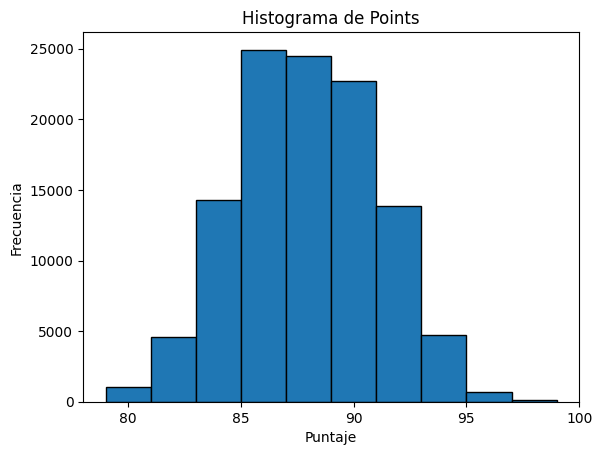

In [23]:
# Crear histograma
plt.hist(dataset['points'], edgecolor='black', align='left')

# Títulos y etiquetas
plt.title('Histograma de Points')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.xticks([80, 85, 90, 95, 100])  # Marcar los bordes de los intervalos

# Mostrar gráfico
plt.show()


In [29]:
# Seabor initial configuration
sns.set_style("darkgrid")
sns.set_palette("muted")

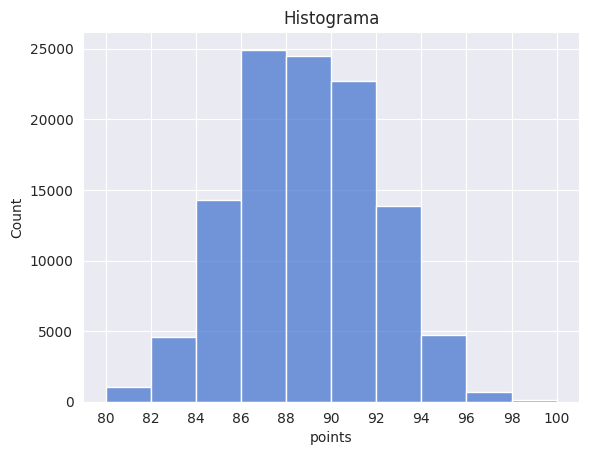

In [40]:
sns.histplot(data=dataset, 
             x='points', 
             binwidth=2, 
             binrange=(80, 100)
             )

plt.xticks([80,82,84,86,88,90,92,94,96,98,100])
plt.title("Histograma")
plt.show()

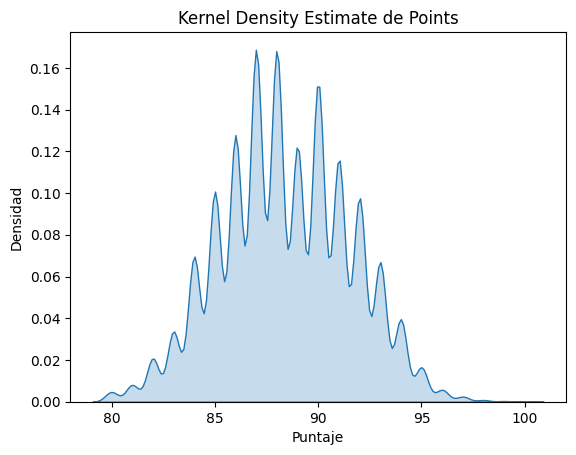

In [26]:
# KDE con Seaborn
sns.kdeplot(data=dataset, x='points', fill=True, bw_adjust=1)

# Títulos y etiquetas
plt.title('Kernel Density Estimate de Points')
plt.xlabel('Puntaje')
plt.ylabel('Densidad')

# Mostrar gráfico
plt.show()

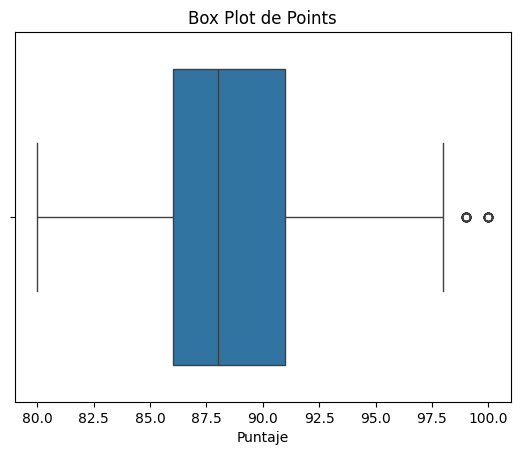

In [27]:
# Box plot
sns.boxplot(x=dataset['points'])

plt.title('Box Plot de Points')
plt.xlabel('Puntaje')

plt.show()

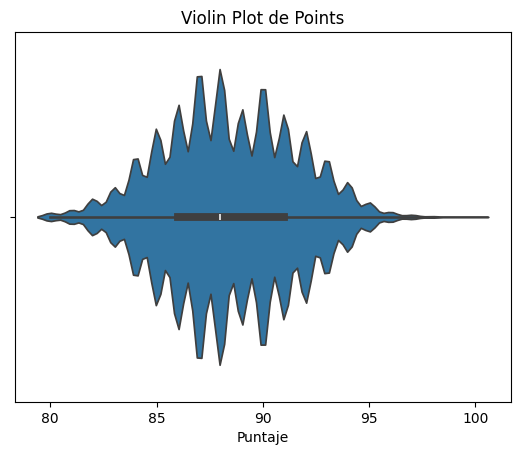

In [28]:
# Violin plot
sns.violinplot(x=dataset['points'], inner='box')  # 'inner' puede ser 'box', 'quartile', 'point', etc.

plt.title('Violin Plot de Points')
plt.xlabel('Puntaje')

plt.show()

### Columna "Price" - Precio

### Columna "Variety" - Variedad

### Columna "title" - titulo